## Imports

In [2]:
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
import random
random.seed(0)
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Module
import cv2
import os
import torchvision
import matplotlib.pyplot as plt 
from PIL import Image
from keras import backend as K

## Auto-Encoder
A convolutional auto-encoder (AE)


In [13]:
class AutoEncoder(Module):
    #  AUTO-ENCODER CLASS
    def __init__(self,bottleneck_size):
        super(AutoEncoder, self).__init__()
        
        # Encoder
        self.conv1NC = nn.Conv2d( 3, 16, 3, 1)
        self.conv2NC = nn.Conv2d(16,64, 3, 1)
        self.conv3NC = nn.Conv2d(64, bottleneck_size, 3, 1)
        self.pool = nn.MaxPool2d( 2, 2)

        # Decoder
        self.conv1DC = nn.ConvTranspose2d(bottleneck_size, 64, 6, 2)
        self.conv2DC = nn.ConvTranspose2d(64, 16, 2, 2)
        self.conv3DC = nn.ConvTranspose2d(16,  3, 2, 2)

    
    def encoder(self,image):
        # ENCODER ARCHITECTURE HERE

        layer1 = self.conv1NC(image)
        layer1 = F.relu(layer1)
        layer1 = self.pool(layer1)

        layer2 = self.conv2NC(layer1)
        layer2 = F.relu(layer2)
        layer2 = self.pool(layer2)

        layer3 = self.conv3NC(layer2)
        layer3 = F.relu(layer3)
        code = self.pool(layer3)
        
        return code
    
    def decoder(self,code):
        # DECODER ARCHITECTURE HERE

        layer1 = self.conv1DC(code)
        layer1 = F.relu(layer1)

        layer2 = self.conv2DC(layer1)
        layer2 = F.relu(layer2)

        layer3 = self.conv3DC(layer2)
        decoded_image = torch.sigmoid(layer3)
        
        return decoded_image
    
    def forward(self,image):
        
        encoded_image = self.encoder(image)
        decoded_image = self.decoder(encoded_image)

        return decoded_image

Testing it on the CelebA and MNIST dataset by encoding and decoding their samples. Compile results showing for each of the dataset and for each sample the input and the AE reconstruction,side-by-side. 

#### Dataloading Cell 

In [14]:
def cropMiddle(img, h, w):
    x = img.shape[0]//2 - w//2
    y = img.shape[1]//2 - h//2
    new = img[y:y + h, x:x + w]
    return new

In [15]:
class CelebA(Dataset):
    # IMPLEMENT THIS DATA LOADING CLASS
    
    def __init__(self, dataset_path=""):
        # DEFINE YOUR PARAMETERS AND VARIABLES YOU NEED HERE.

        imageNames = os.listdir(dataset_path)
        self.imagePaths = [os.path.join(dataset_path,name) for name in imageNames][0:1000]

    def __len__(self):
        # RETURN SIZE OF DATASET
        return len(self.imagePaths)

    def __getitem__(self, idx):
        # RETURN IMAGE AT GIVEN idx
        imagePath = self.imagePaths[idx]
        image = cv2.imread(imagePath)
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cropMiddle(image, 128, 128) # crop from middle of the image
        image = torch.from_numpy(image).permute(2,0,1).float()
        
        return image
    
class MNIST(Dataset):
    # IMPLEMENT THIS DATA LOADING CLASS
    
    def __init__(self, dataset_path=""):
        imageNames = os.listdir(dataset_path)
        self.imagePaths = [os.path.join(dataset_path,name) for name in imageNames][0:5000]

    def __len__(self):
        # RETURN SIZE OF DATASET
        return len(self.imagePaths)

    def __getitem__(self, idx):
        # RETURN IMAGE AT GIVEN idx
        imagePath = self.imagePaths[idx]
        image = cv2.imread(imagePath)
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cropMiddle(image, 24, 24) # crop from middle of the image
        image = torch.from_numpy(image).permute(2,0,1).float()
        
        return image

celeba_train_data_path = "Dataset/CelebA/train/"
celeba_train_dataset = CelebA(celeba_train_data_path)
torch_train_celeba = DataLoader(celeba_train_dataset,shuffle=True,batch_size=12,num_workers=1)  # YOU CAN CHOOSE YOUR BATCH SIZE

celeba_validation_data_path = "Dataset/CelebA/validation/"
celeba_validation_dataset = CelebA(celeba_validation_data_path)
torch_validation_celeba = DataLoader(celeba_validation_dataset,shuffle=True,batch_size=12,num_workers=1)  # YOU CAN CHOOSE YOUR BATCH SIZE

mnist_train_data_path = "Dataset/MNIST/train/"
mnist_train_dataset = MNIST(mnist_train_data_path)
torch_train_mnist = DataLoader(mnist_train_dataset,shuffle=True,batch_size=12,num_workers=1)  # YOU CAN CHOOSE YOUR BATCH SIZE

mnist_validation_data_path = "Dataset/MNIST/validation/"
mnist_validation_dataset = MNIST(mnist_validation_data_path)
torch_validation_mnist = DataLoader(mnist_validation_dataset,shuffle=True,batch_size=12,num_workers=1)  # YOU CAN CHOOSE YOUR BATCH SIZE

#### Auto-Encoder training cell

CelebA - Epoch: 1 / 100  |  Loss: 0.013718834146857262


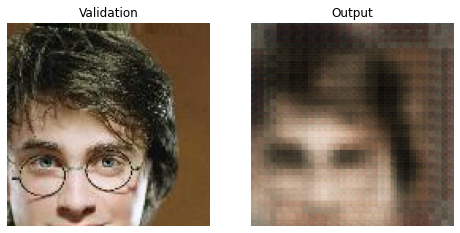

CelebA - Epoch: 11 / 100  |  Loss: 0.0030550998635590076


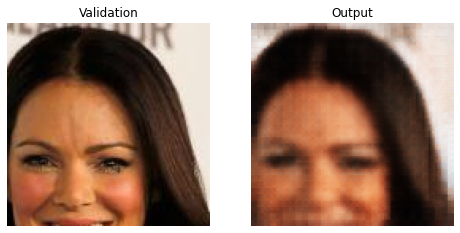

CelebA - Epoch: 21 / 100  |  Loss: 0.0030609345994889736


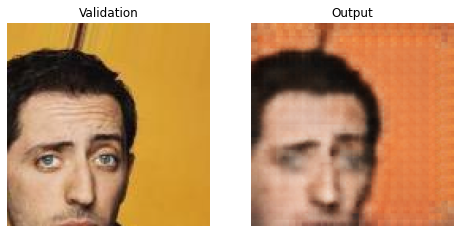

CelebA - Epoch: 31 / 100  |  Loss: 0.004651240073144436


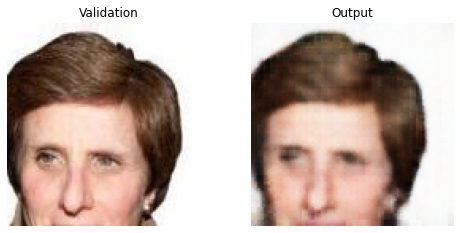

CelebA - Epoch: 41 / 100  |  Loss: 0.0056554460898041725


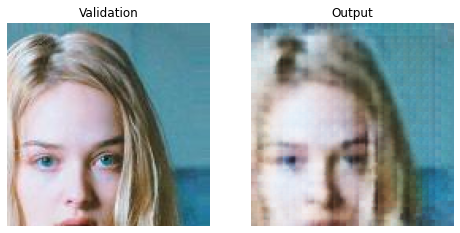

CelebA - Epoch: 51 / 100  |  Loss: 0.002188082318753004


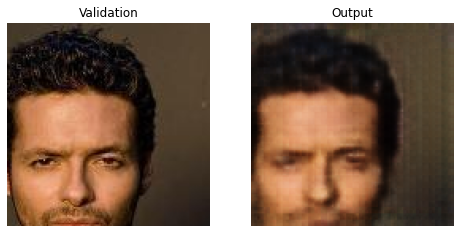

CelebA - Epoch: 61 / 100  |  Loss: 0.0041087898425757885


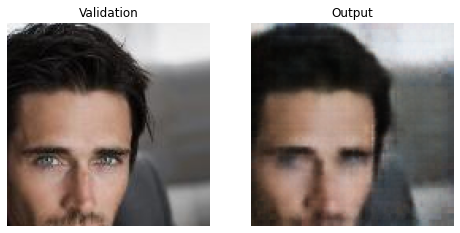

CelebA - Epoch: 71 / 100  |  Loss: 0.003636784851551056


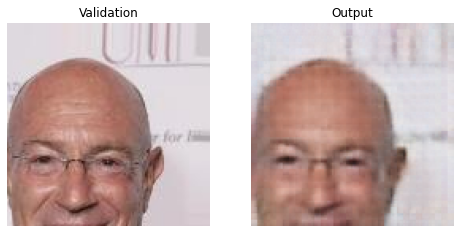

CelebA - Epoch: 81 / 100  |  Loss: 0.0023150162305682898


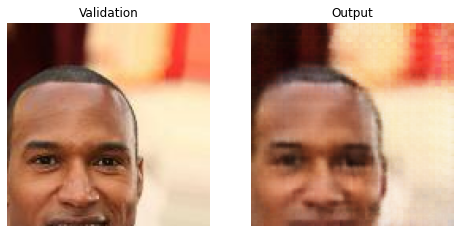

CelebA - Epoch: 91 / 100  |  Loss: 0.002246540505439043


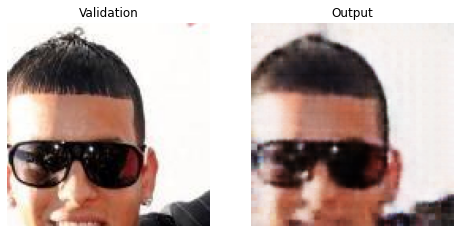

MNIST - Epoch: 1 / 100  |  Loss: 0.038971997797489166


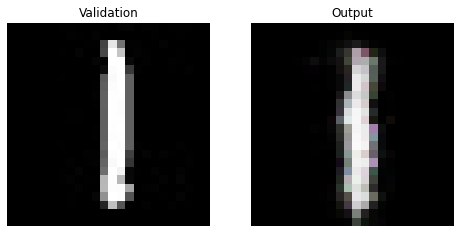

MNIST - Epoch: 11 / 100  |  Loss: 0.015697600319981575


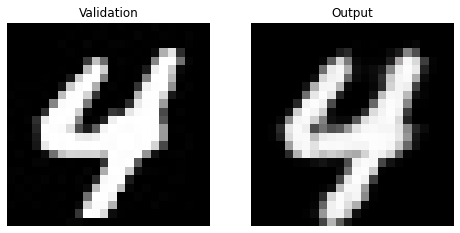

MNIST - Epoch: 21 / 100  |  Loss: 0.007853124290704727


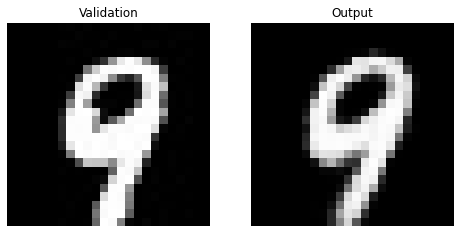

MNIST - Epoch: 31 / 100  |  Loss: 0.01407838985323906


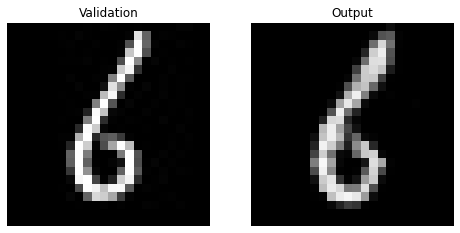

MNIST - Epoch: 41 / 100  |  Loss: 0.012213817797601223


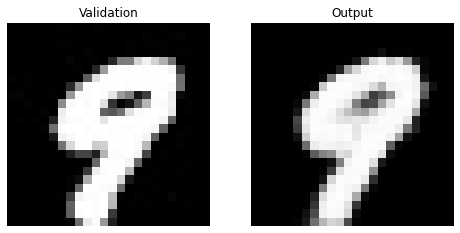

MNIST - Epoch: 51 / 100  |  Loss: 0.008301936089992523


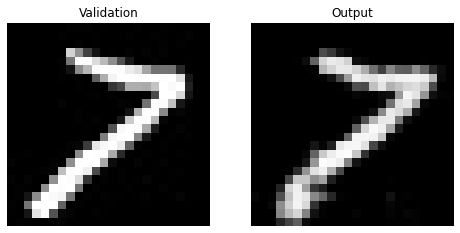

MNIST - Epoch: 61 / 100  |  Loss: 0.008679825812578201


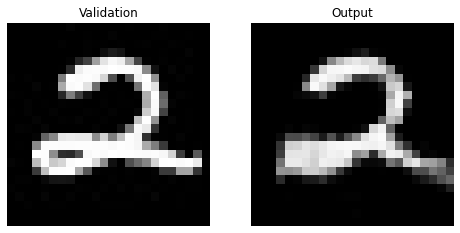

MNIST - Epoch: 71 / 100  |  Loss: 0.008542130701243877


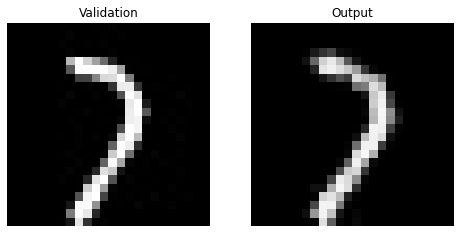

MNIST - Epoch: 81 / 100  |  Loss: 0.010124776512384415


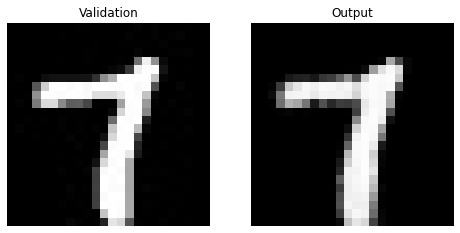

MNIST - Epoch: 91 / 100  |  Loss: 0.008370443247258663


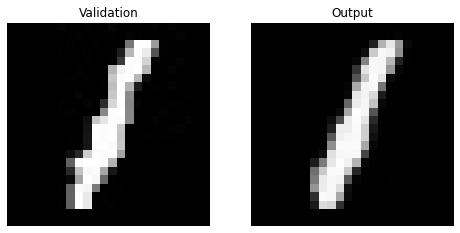

MNIST - Epoch: 100 / 100  |  Loss: 0.00893049594014883


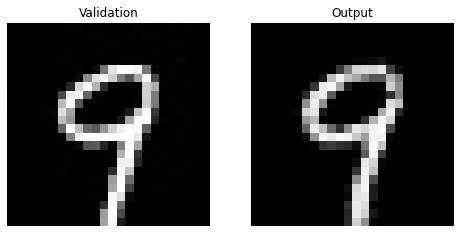

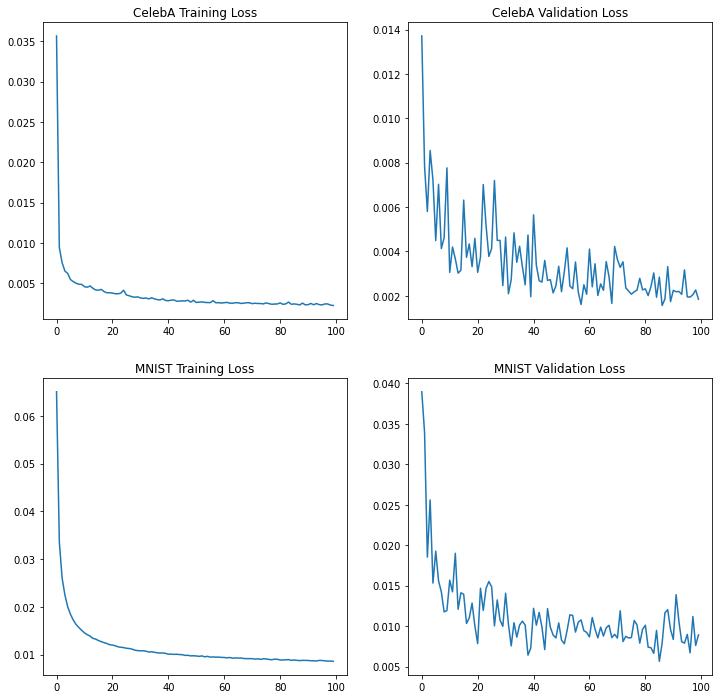

In [16]:
def reconstruction_loss(input,target):
    L = nn.MSELoss().cuda()
    loss = L(input,target)
    return loss

epochs = 100 # CHOOSE YOUR EPOCH SIZE TO GET BEST RESULTS

celeba_bottleneck_size = 512 # CHOOSE YOUR BOTTLENECK SIZE. ONCE CHOSEN, USE THE SAME FOR ALL OF Q3 and Q4, for CelebA
mnist_bottleneck_size = 128 # CHOOSE YOUR BOTTLENECK SIZE. ONCE CHOSEN, USE THE SAME FOR ALL OF Q3 and Q4, for MNIST.

celeba_autoencoder = AutoEncoder(celeba_bottleneck_size).cuda()
mnist_autoencoder = AutoEncoder(mnist_bottleneck_size).cuda()

# OPTIMIZER SECTION: USE THE TORCH API TO WRITE YOUR OPTIMIZER FUNCTION BELOW
learningRate = 0.005
celeba_optimizer = torch.optim.Adam(celeba_autoencoder.parameters(), lr=learningRate)
mnist_optimizer = torch.optim.Adam(mnist_autoencoder.parameters(), lr=learningRate)

# Recording the loss
celebaTrainLossRecord = []
celebaValLossRecord = []
mnistTrainLossRecord = []
mnistValLossRecord = []


# IN THE TRAINING LOOPS BELOW, USE THE DEFINED NETWORK, LOSS FUNCTION AND OPTIMIZER.
for ep in range(epochs):
    celebaTrainLoss = 0.0
    for i,data in enumerate(torch_train_celeba):
        # load image
        img = data.cuda()
        # clearging the gradients
        celeba_optimizer.zero_grad()
        # calculate the output prediction
        output = celeba_autoencoder(img).cuda()
        # loss calculation
        loss = reconstruction_loss(output,img).cuda()
        # backward pass
        loss.backward()
        # optimization
        celeba_optimizer.step()
        # update loss
        celebaTrainLoss += loss.item()

    celebaLossT = celebaTrainLoss / len(torch_train_celeba)
    celebaTrainLossRecord.append(celebaLossT)
    
    celebaValLoss = 0.0
    for i,data in enumerate(torch_validation_celeba):
        # load image
        imgVal = data.cuda()
        # calculate the output prediction
        outputVal = celeba_autoencoder(imgVal).cuda()
        # loss calculation
        loss = reconstruction_loss(output,img).cuda()
        # update loss
        celebaValLoss += loss.item()

    celebaLossV = celebaValLoss / len(torch_validation_celeba)
    celebaValLossRecord.append(celebaLossV)

    if (ep % 10 == 0):
      print('CelebA - Epoch: {} / {}  |  Loss: {}'.format(ep+1, epochs, celebaLossV))
      
      validationImage = imgVal.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
      outputImage = outputVal.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]

      fig, axis = plt.subplots(1, 2, figsize = (8,8))
      plt.subplot(1, 2, 1)
      plt.title("Validation")
      plt.axis('off')
      plt.imshow(validationImage)
      plt.subplot(1, 2, 2)
      plt.title("Output")
      plt.axis('off')
      plt.imshow(outputImage)
      plt.show()


for ep in range(epochs):
    mnistTrainLoss = 0.0
    for i,data in enumerate(torch_train_mnist):
        # load image
        img = data.cuda()
        # clearging the gradients
        mnist_optimizer.zero_grad()
        # calculate the output prediction
        output = mnist_autoencoder(img).cuda()
        # loss calculation
        loss = reconstruction_loss(output,img).cuda()
        # backward pass
        loss.backward()
        # optimization
        mnist_optimizer.step()
        # update loss
        mnistTrainLoss += loss.item()

    mnistLossT = mnistTrainLoss / len(torch_train_mnist)
    mnistTrainLossRecord.append(mnistLossT)

    mnistValLoss = 0.0
    for i,data in enumerate(torch_validation_mnist):
        # load image
        imgVal = data.cuda()
        # calculate the output prediction
        outputVal = mnist_autoencoder(imgVal).cuda()
        # loss calculation
        loss = reconstruction_loss(output,img).cuda()
        # update loss
        mnistValLoss += loss.item()

    mnistLossV = mnistValLoss / len(torch_validation_mnist)
    mnistValLossRecord.append(mnistLossV)
    
    if (ep % 10 == 0) or (ep+1 == epochs):
      print('MNIST - Epoch: {} / {}  |  Loss: {}'.format(ep+1, epochs, mnistLossV))
      
      validationImage = imgVal.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
      outputImage = outputVal.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]

      fig, axis = plt.subplots(1, 2, figsize = (8,8))
      plt.subplot(1, 2, 1)
      plt.title("Validation")
      plt.axis('off')
      plt.imshow(validationImage, vmin=np.min(validationImage), vmax=np.max(validationImage))
      plt.subplot(1, 2, 2)
      plt.title("Output")
      plt.axis('off')
      plt.imshow(outputImage)
      plt.show()


fig, axis = plt.subplots(2, 2, figsize = (12,12))
plt.subplot(2, 2, 1)
plt.title("CelebA Training Loss")
plt.plot(celebaTrainLossRecord)
plt.subplot(2, 2, 2)
plt.title("CelebA Validation Loss")
plt.plot(celebaValLossRecord)
plt.subplot(2, 2, 3)
plt.title("MNIST Training Loss")
plt.plot(mnistTrainLossRecord)
plt.subplot(2, 2, 4)
plt.title("MNIST Validation Loss")
plt.plot(mnistValLossRecord)
plt.show()